# Task-03: Building up a Decision Tree Classifier to Predict Purchase of customer

Dataset: bank.csv

importing necessary librarires

In [18]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading Dataset

In [2]:
df = pd.read_csv("bank.csv")

Checking dataset's consistency & cleanliness

In [3]:
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

Total Rows: 11162
Total Columns: 17


In [4]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [6]:
# Count duplicate rows
print("Total Duplicate Rows:", df.duplicated().sum())

Total Duplicate Rows: 0


In [7]:
# For categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col} unique values:\n{df[col].value_counts()}\n")


job unique values:
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

marital unique values:
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

education unique values:
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

default unique values:
default
no     10994
yes      168
Name: count, dtype: int64

housing unique values:
housing
no     5881
yes    5281
Name: count, dtype: int64

loan unique values:
loan
no     9702
yes    1460
Name: count, dtype: int64

contact unique values:
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

month unique values:
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
ap

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Dataset is clean already. Ready for Model Train.

# Decision Tree Classifier Model

Encode categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copying dataframe to avoid changing original
data = df.copy()

# List of categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


Split dataset into features and target

In [11]:
# Features (all columns except 'deposit')
X = data.drop('deposit', axis=1)

# Target
y = data['deposit']

Train-test split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Build the Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initializing and training the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting on test set
y_pred = dt_model.predict(X_test)


Evaluate the model

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7630989699955217

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78      1166
           1       0.76      0.74      0.75      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233


Confusion Matrix:
 [[915 251]
 [278 789]]


Feature Importance

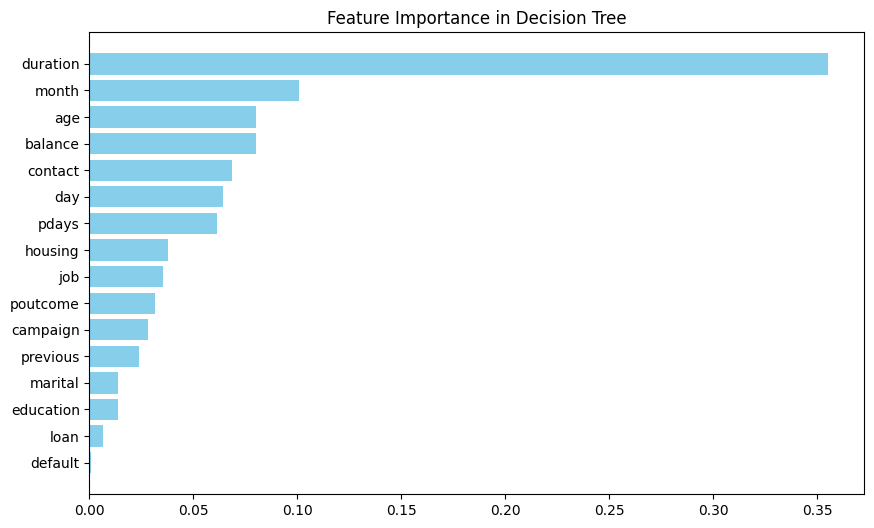

In [15]:
import matplotlib.pyplot as plt

# Feature importance
importances = dt_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title("Feature Importance in Decision Tree")
plt.show()


This shows which features most influence a customer’s decision to deposit. from this output we can see the most important features are serially : duration,month,age,balance,contact,day,pdays,housing,job,poucome,campaign,previous,marital,education,loan,default.

Top Predictive Features for Customer Deposit Decision

duration – Strongest predictor; longer call durations often lead to positive outcomes (deposit = yes).

month – The campaign’s month influences success (some months perform better).

age – Age affects purchasing behavior; middle-aged customers might be more likely to deposit.

balance – Customers with higher account balances may have higher purchasing power.

contact – Type of contact method (e.g., cellular, unknown) affects success.

day – The day of the last contact may influence the outcome.

pdays – Number of days since the client was last contacted (recency effect).

housing – Having a housing loan can influence decision capability.

job – Different job types show different likelihoods to deposit.

poutcome – Outcome of the previous campaign contact (important but not top-ranked).

campaign – Number of contacts during the current campaign.

previous – Number of previous contacts.

marital – Marital status shows mild influence.

education – Education level has a small impact.

loan – Whether they have a personal loan.

default – Least impactful; few people are in default, so it contributes little.

Visualizing the Tree 

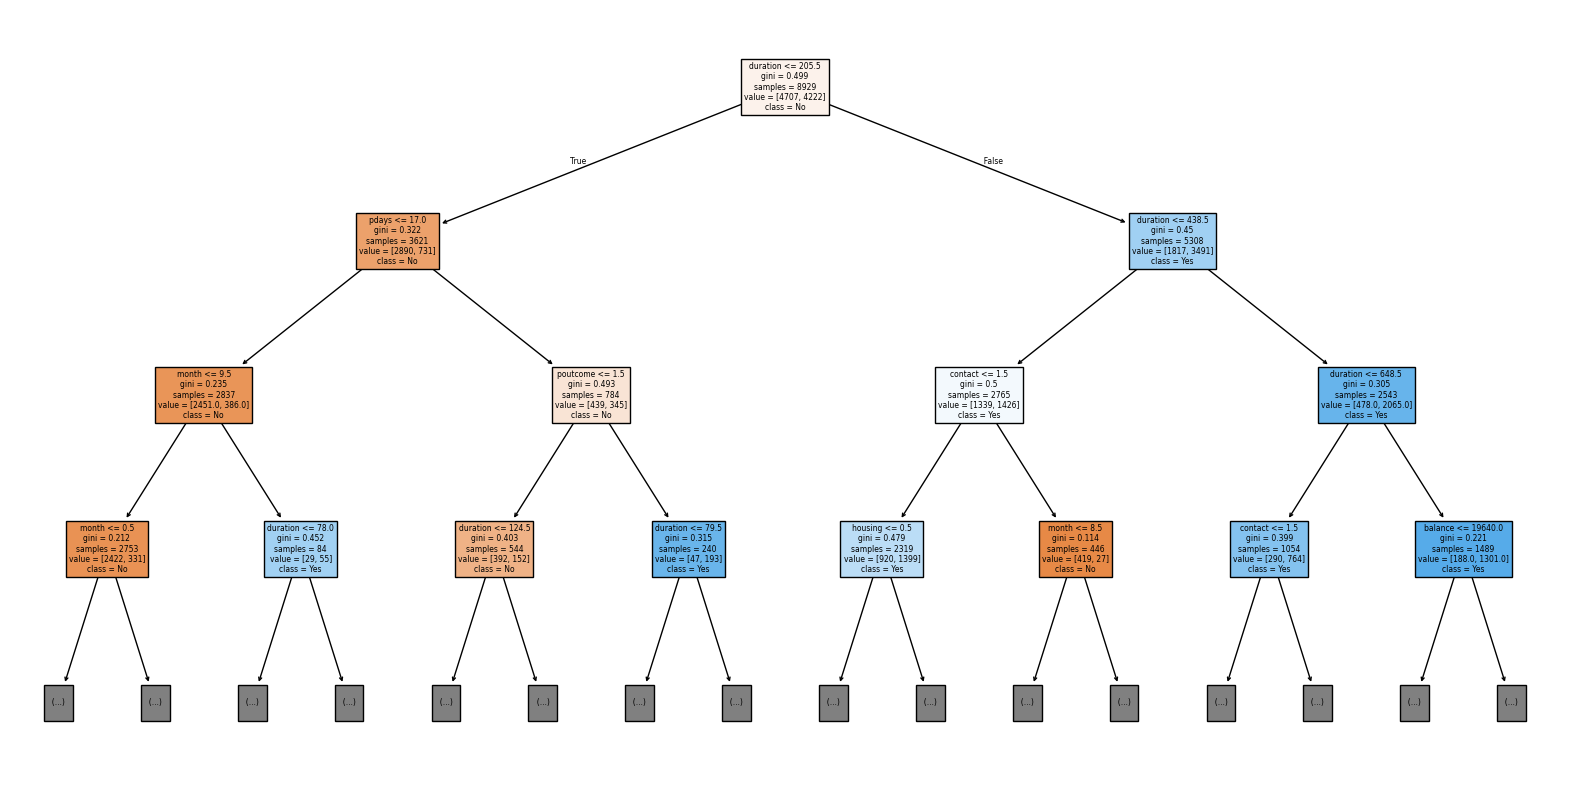

In [16]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, max_depth=3)
plt.show()

Confusion Matrix Visualization

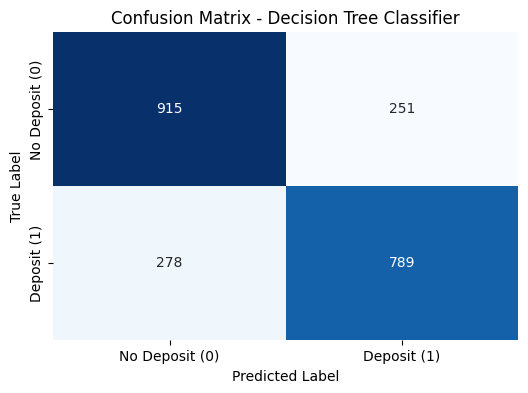

In [ ]:
from sklearn.metrics import confusion_matrix
# Computing confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Deposit (0)', 'Deposit (1)'],
            yticklabels=['No Deposit (0)', 'Deposit (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


Interpretation:

Top-left (915) → Correctly predicted “No Deposit”

Bottom-right (789) → Correctly predicted “Deposit”

Top-right (251) → “No Deposit” customers wrongly predicted as “Deposit”

Bottom-left (278) → “Deposit” customers wrongly predicted as “No Deposit”

76% accuracy is a good baseline, but I can definitely improve it.

Hyperparameter Tuning

optimizing these parameters using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Defining parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initializing model
dt = DecisionTreeClassifier(random_state=42)

# Performing grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.8203611030078324


Then retraining with the best parameters:

In [21]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Test Accuracy after tuning:", accuracy_score(y_test, y_pred_best))


Test Accuracy after tuning: 0.80653828929691


That’s a significant improvement — from 76% → 80.65% test accuracy and 82% cross-validation accuracy after tuning

Visualizing the tuned Decision Tree

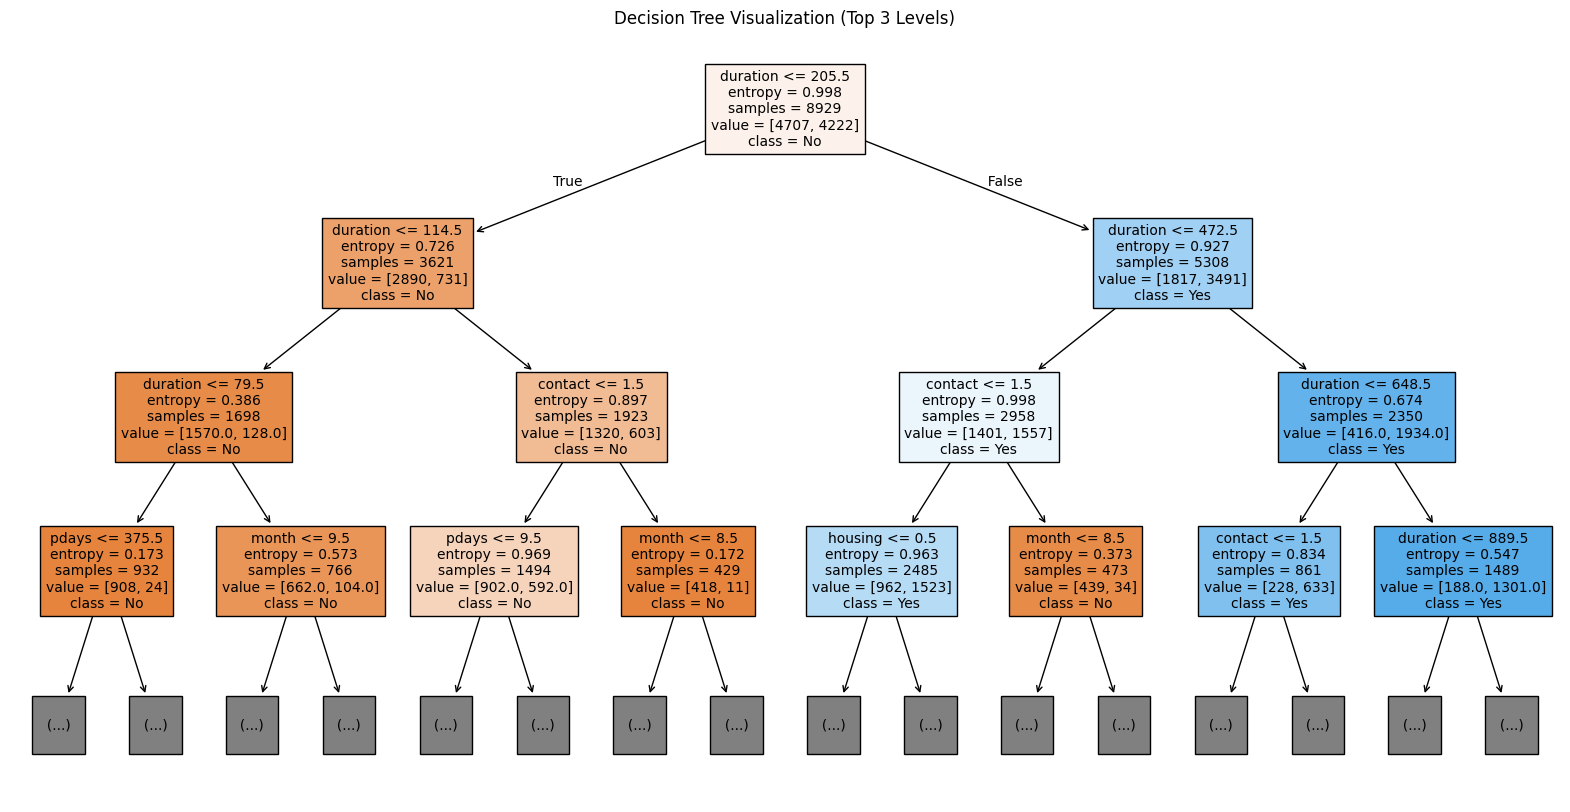

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, class_names=['No', 'Yes'], 
          filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree Visualization (Top 3 Levels)")
plt.show()


This shows the top decision splits the model makes.

AUC–ROC Curve for Decision Tree Classifier

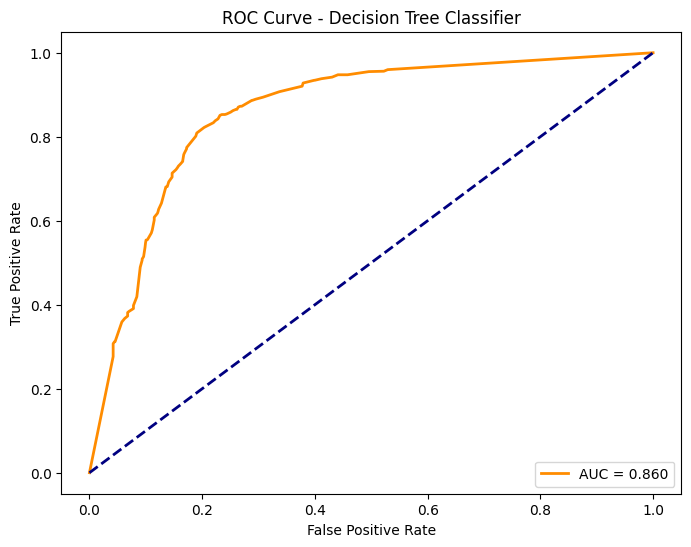

AUC Score: 0.8601214350361139


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Getting predicted probabilities for class 1 (Deposit = Yes)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculating ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating AUC
auc_score = roc_auc_score(y_test, y_prob)

# Plotting ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # random line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", auc_score)


Interpretation of ROC–AUC Curve:

AUC Score: 0.86

This indicates the model has a good ability to distinguish between customers who will make a deposit and those who won’t.

The closer AUC is to 1, the better the model’s predictive capability.

In this case:

The Decision Tree model not only achieves 80.6% accuracy,

but also shows 0.86 AUC, confirming balanced and effective classification.

Insight:

My tuned Decision Tree performs well both in terms of:

Accuracy (0.81) → predicts correctly most of the time.

AUC (0.86) → separates classes effectively, even when probabilities overlap.

Now Full Evaluation Summary

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions & probabilities
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Printing
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC:       {auc:.4f}")


Accuracy:  0.8065
Precision: 0.7953
Recall:    0.8013
F1-Score:  0.7983
AUC:       0.8601


Confusion Matrix – Tuned Decision Tree

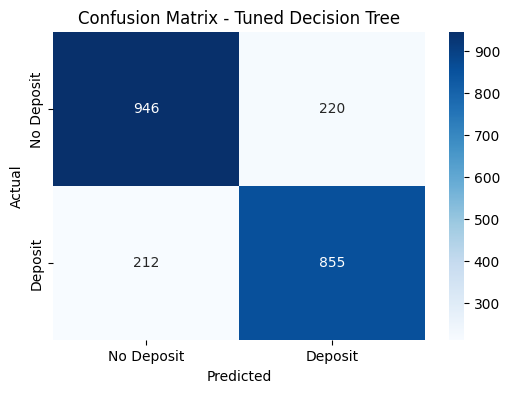

In [ ]:
from sklearn.metrics import confusion_matrix

# Computing confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plotting heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Deposit', 'Deposit'],
            yticklabels=['No Deposit', 'Deposit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Decision Tree')
plt.show()


Interpretation:

Top-left (946): Correctly predicted No Deposit

Bottom-right (855): Correctly predicted Deposit

Top-right (220): No Deposit predicted as Deposit (False Positives)

Bottom-left (212): Deposit predicted as No Deposit (False Negatives)

# Final Overview of my Model Prediction by: 
# Tuned Decision Tree Classifier

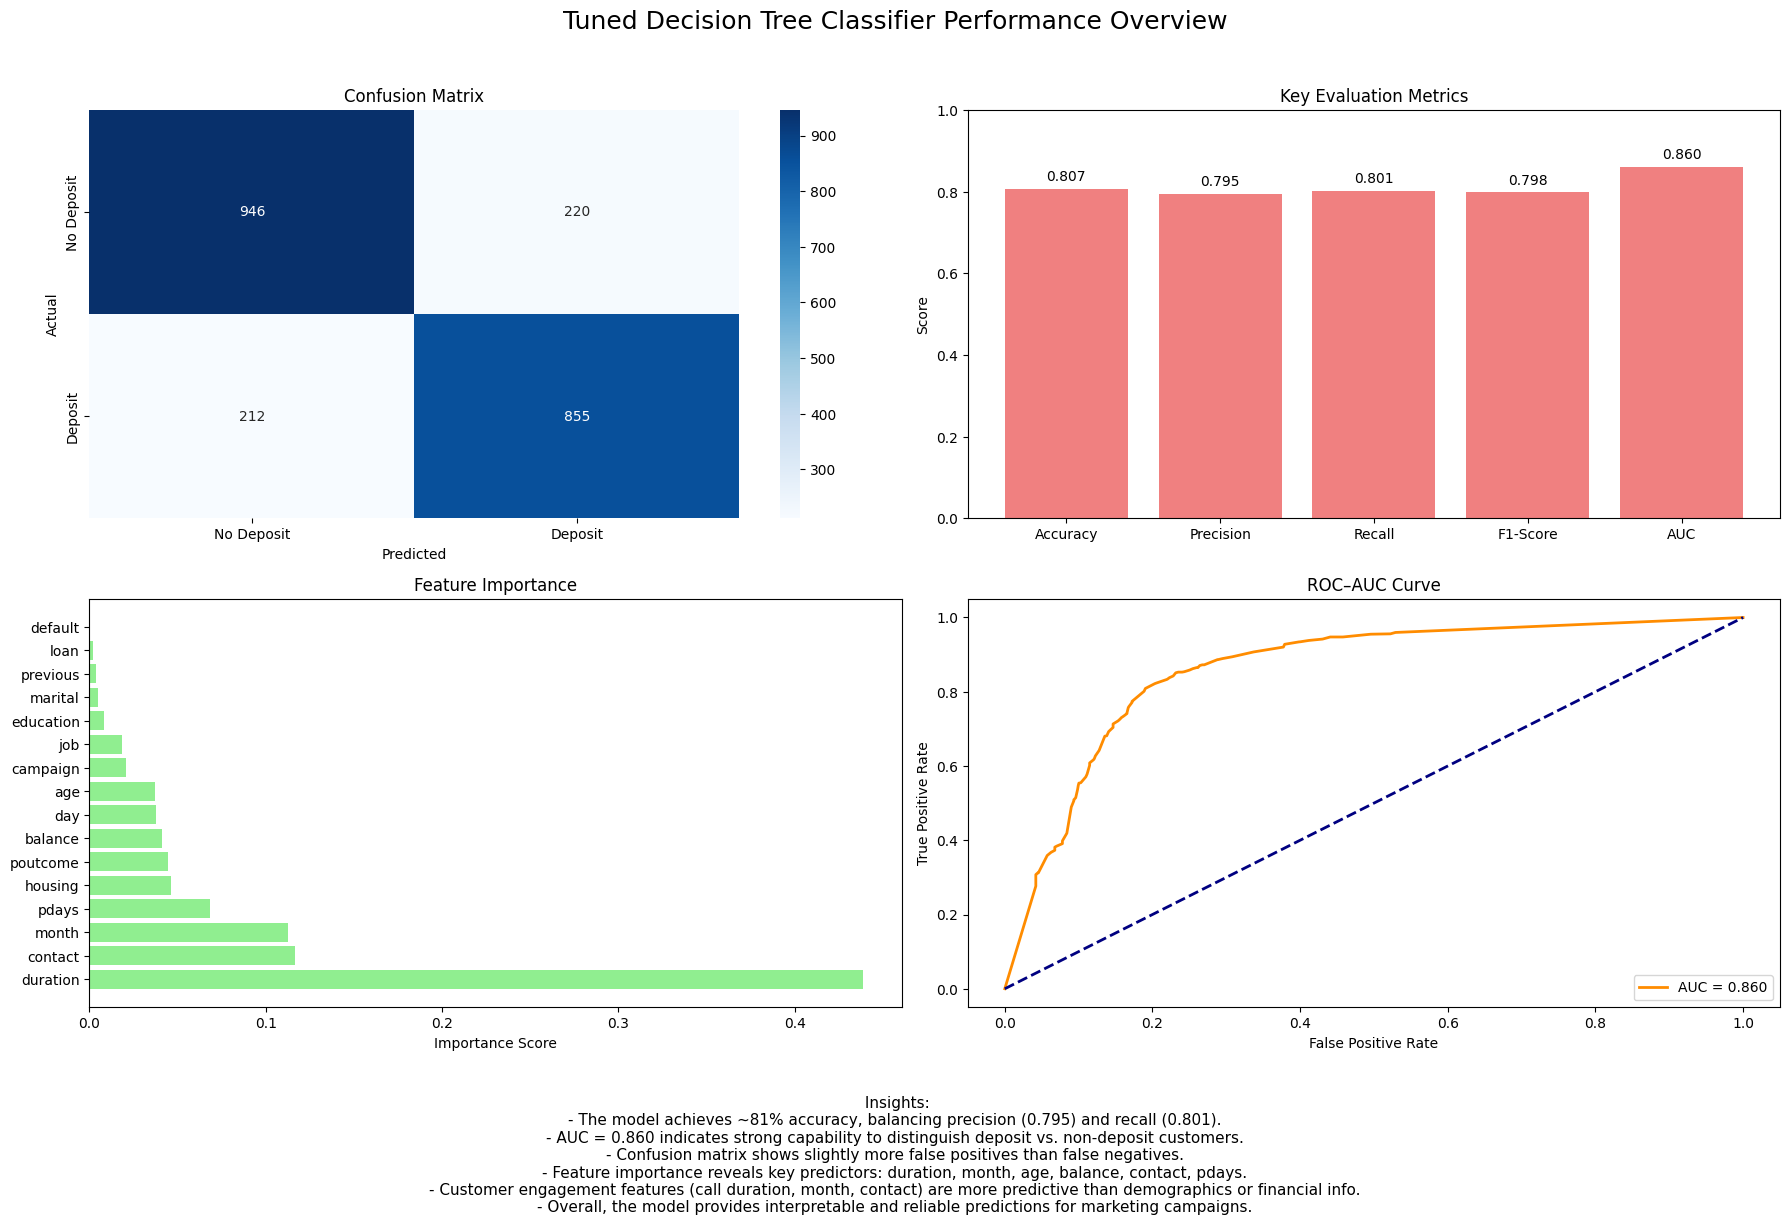

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predictions and probabilities
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_prob)
}

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Feature Importance
importances = best_model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]  # descending order

# Creating figure with 2x2 layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18,12))

# 1️⃣ Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['No Deposit', 'Deposit'],
            yticklabels=['No Deposit', 'Deposit'])
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Confusion Matrix')

# 2️⃣ Key Evaluation Metrics Bar Chart
ax2.bar(metrics.keys(), metrics.values(), color='lightcoral')
ax2.set_ylim(0,1)
for i, v in enumerate(metrics.values()):
    ax2.text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=10)
ax2.set_title('Key Evaluation Metrics')
ax2.set_ylabel('Score')

# 3️⃣ Feature Importance
ax3.barh(range(len(features)), importances[indices], color='lightgreen')
ax3.set_yticks(range(len(features)))
ax3.set_yticklabels([features[i] for i in indices])
ax3.set_xlabel('Importance Score')
ax3.set_title('Feature Importance')

# 4️⃣ ROC–AUC Curve
ax4.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.3f}')
ax4.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('ROC–AUC Curve')
ax4.legend(loc='lower right')

# Overall title
plt.suptitle("Tuned Decision Tree Classifier Performance Overview", fontsize=18, y=0.95)

# Add insights as text below the figure
insights = (
    " Insights:\n"
    "- The model achieves ~81% accuracy, balancing precision (0.795) and recall (0.801).\n"
    "- AUC = 0.860 indicates strong capability to distinguish deposit vs. non-deposit customers.\n"
    "- Confusion matrix shows slightly more false positives than false negatives.\n"
    "- Feature importance reveals key predictors: duration, month, age, balance, contact, pdays.\n"
    "- Customer engagement features (call duration, month, contact) are more predictive than demographics or financial info.\n"
    "- Overall, the model provides interpretable and reliable predictions for marketing campaigns."
)

# Place insights at bottom
fig.text(0.5, -0.05, insights, ha='center', fontsize=11, wrap=True)

plt.tight_layout(rect=[0,0.07,1,0.93])
plt.show()

# Place text below subplots
fig.text(0.5, -0.05, insights, ha='center', fontsize=10, wrap=True)

# Overall title and layout
plt.suptitle("Tuned Decision Tree Classifier Performance Overview", fontsize=16)
plt.tight_layout(rect=[0,0.1,1,0.95])
plt.show()

Conclusion – Decision Tree Classifier for Bank Deposit Prediction

A Decision Tree model was successfully built and tuned to predict whether a customer will make a deposit based on demographic and behavioral data.

The tuned classifier achieved:

Accuracy: 0.8065

Precision: 0.7953

Recall: 0.8013

F1-Score: 0.7983

AUC: 0.8601

Key Insights:

Customer engagement features such as call duration, contact type, and month were the most influential predictors.

The model effectively distinguishes deposit vs. non-deposit customers, as shown by the ROC–AUC curve.

The confusion matrix confirms a balanced performance with slightly more false positives than false negatives.

Overall:
The Decision Tree classifier provides interpretable, reliable, and actionable predictions that can support targeted marketing campaigns and customer engagement strategies.

# Task-03 Completed Successfully !